In [13]:
import numpy as npy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as ndimage

In [14]:
def plot_and_print_comparison(disparity_map_path, disparity_image_path, absolute_map_path, absolute_image_path, disparity_figure_title_suffix = '', absolute_figure_title_suffix = ''):
    
    avfoundation_disparity_inverted = npy.load(disparity_map_path)
    avfoundation_disparity_inverted_image = mpimg.imread(disparity_image_path)
    # Need to make sure image is in correct orientation
    avfoundation_disparity_inverted_image = ndimage.rotate(avfoundation_disparity_inverted_image, 270, reshape=True)
    
    print("Printing disparity inverted:")
    print(avfoundation_disparity_inverted)
    print(f"Min value: {avfoundation_disparity_inverted.min()}")
    print(f"Max value: {avfoundation_disparity_inverted.max()}")
    print("\n")
    
    arkit_absolutedepth = npy.load(absolute_map_path)
    arkit_absolutedepth_image = mpimg.imread(absolute_image_path)
    print("Printing absolute depth map:")
    print(arkit_absolutedepth)
    print(f"Min value: {arkit_absolutedepth.min()}")
    print(f"Max value: {arkit_absolutedepth.max()}")
    
    smallest_depth_value = min(avfoundation_disparity_inverted.min(), arkit_absolutedepth.min())
    largest_depth_value = max(avfoundation_disparity_inverted.max(), arkit_absolutedepth.max())
    
    # AVFoundation disparity inverted plot
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig1.suptitle(f'Color map: AVFoundation disparity inverse{disparity_figure_title_suffix}\nColor map range is from {smallest_depth_value} to {largest_depth_value}')

    ax1.set_title('Color map of depth')
    ax1.set_xlabel('Pixel column')
    ax1.set_ylabel('Pixel row')
    ax1img = ax1.imshow(avfoundation_disparity_inverted, cmap="plasma", vmin=smallest_depth_value, vmax=largest_depth_value)
    fig1.colorbar(ax1img, ax = ax1)

    ax2.set_title('RGB image')
    ax2.set_xlabel('Pixel column')
    ax2.set_ylabel('Pixel row')
    ax2.imshow(avfoundation_disparity_inverted_image)

    fig1.tight_layout()
    
    # ARKit absolute depth plot
    fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2)
    fig2.suptitle(f'Color map: ARKit absolute depth{absolute_figure_title_suffix}')

    ax3.set_title('Color map of depth')
    ax3.set_xlabel('Pixel column')
    ax3.set_ylabel('Pixel row')
    ax3img = ax3.imshow(arkit_absolutedepth, cmap="plasma", vmin=smallest_depth_value, vmax=largest_depth_value)
    fig2.colorbar(ax3img, ax=ax3)

    ax4.set_title('RGB image')
    ax4.set_xlabel('Pixel column')
    ax4.set_ylabel('Pixel row')
    ax4.imshow(arkit_absolutedepth_image)

    fig2.tight_layout()
    
    

Printing disparity inverted:
[[0.96603775 0.96603775 0.96603775 ... 0.9799043  0.97803247 0.97803247]
 [0.96694994 0.9678639  0.9678639  ... 0.98178333 0.9808429  0.98178333]
 [0.9678639  0.969697   0.9706161  ... 0.9836695  0.9827255  0.9836695 ]
 ...
 [1.0694517  1.0694517  1.0700104  ... 1.0778947  1.0801687  1.0813094 ]
 [1.0694517  1.0700104  1.0711297  ... 1.0773277  1.0784624  1.0784624 ]
 [1.0694517  1.0705698  1.0716902  ... 1.0767612  1.0767612  1.0767612 ]]
Min value: 0.9472710490226746
Max value: 1.0847457647323608


Printing absolute depth map:
[[0.9272461  0.9213867  0.921875   ... 0.9560547  0.9482422  0.96728516]
 [0.9160156  0.9433594  0.93652344 ... 0.9448242  0.96240234 0.9296875 ]
 [0.9238281  0.9199219  0.9272461  ... 0.94921875 0.94433594 0.93408203]
 ...
 [1.0214844  1.0351562  1.0332031  ... 1.0703125  1.0634766  1.0664062 ]
 [1.0400391  1.0576172  1.0351562  ... 1.0712891  1.0634766  1.0673828 ]
 [1.0244141  1.03125    1.0361328  ... 1.0703125  1.0800781  1.074

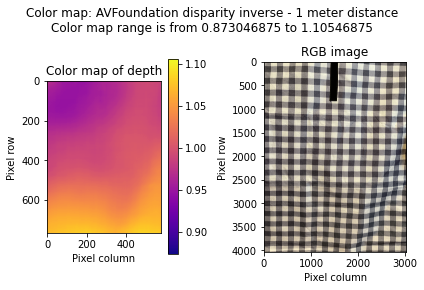

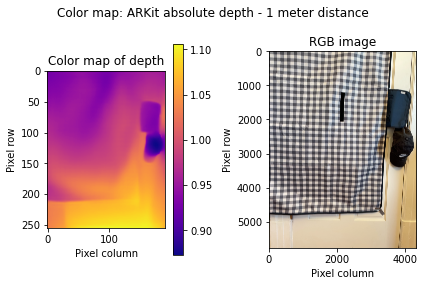

In [15]:
# Photo of flat wall 1 meter away
plot_and_print_comparison(
    'Photo1-1meterDistance/AVFoundationDisparityInverted/photo1-disparitymap_inverted.npy',
    'Photo1-1meterDistance/AVFoundationDisparityInverted/photo1-disparityimage.jpeg',
    'Photo1-1meterDistance/ARKitAbsoluteDepth/photo1-absolutedepthmap.npy',
    'Photo1-1meterDistance/ARKitAbsoluteDepth/photo1-absolute_image.jpeg',
    ' - 1 meter distance',
    ' - 1 meter distance'
)

Printing disparity inverted:
[[0.79012346 0.78890604 0.78951424 ... 0.77752465 0.77752465 0.77752465]
 [0.79012346 0.78951424 0.79012346 ... 0.77752465 0.77752465 0.77752465]
 [0.79012346 0.79012346 0.79012346 ... 0.77752465 0.77752465 0.77752465]
 ...
 [0.8366013  0.8366013  0.8366013  ... 0.7944143  0.7950311  0.7956488 ]
 [0.8366013  0.8366013  0.8366013  ... 0.79379845 0.79379845 0.79379845]
 [0.8366013  0.8366013  0.8366013  ... 0.79318357 0.79256964 0.79318357]]
Min value: 0.7763457298278809
Max value: 0.8366013169288635


Printing absolute depth map:
[[2.0664062 2.0742188 2.0742188 ... 1.9160156 1.8984375 1.9023438]
 [2.0878906 2.1113281 2.0976562 ... 1.8974609 1.9189453 1.8701172]
 [2.0722656 2.0722656 2.0878906 ... 1.9013672 1.9023438 1.8642578]
 ...
 [1.1816406 1.1953125 1.1933594 ... 1.1005859 1.0917969 1.1015625]
 [1.1884766 1.2099609 1.1884766 ... 1.0898438 1.09375   1.09375  ]
 [1.1748047 1.1787109 1.1865234 ... 1.0849609 1.0908203 1.0839844]]
Min value: 1.083984375
Max v

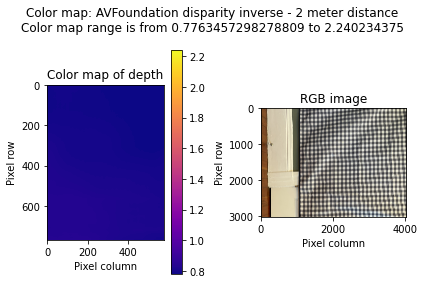

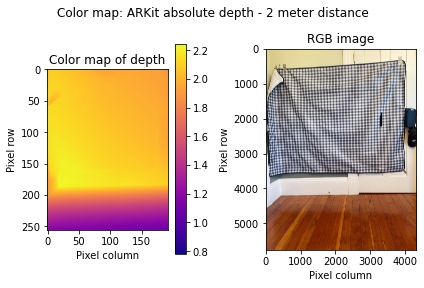

In [16]:
# Photo of flat wall 2 meters away
plot_and_print_comparison(
    'Photo2-2meterDistance/AVFoundationDisparityInverted/photo2-disparitymap_inverted.npy',
    'Photo2-2meterDistance/AVFoundationDisparityInverted/photo2-disparityimage.jpeg',
    'Photo2-2meterDistance/ARKitAbsoluteDepth/photo2-absolutedepthmap.npy',
    'Photo2-2meterDistance/ARKitAbsoluteDepth/photo2-absolute_image.jpeg',
    ' - 2 meter distance',
    ' - 2 meter distance'
)

In [ ]:
# Photo of indoor hallway
plot_and_print_comparison(
    'Photo3/AVFoundationDisparityInverted/photo3-disparitymap_inverted.npy',
    'Photo3/AVFoundationDisparityInverted/photo3-disparityimage.jpeg',
    'Photo3/ARKitAbsoluteDepth/photo3-absolutedepthmap.npy',
    'Photo3/ARKitAbsoluteDepth/photo3-absolute_image.jpeg',
)

In [ ]:
# Photo of desk
plot_and_print_comparison(
    'Photo4/AVFoundationDisparityInverted/photo4-disparitymap_inverted.npy',
    'Photo4/AVFoundationDisparityInverted/photo4-disparityimage.jpeg',
    'Photo4/ARKitAbsoluteDepth/photo4-absolutedepthmap.npy',
    'Photo4/ARKitAbsoluteDepth/photo4-absolute_image.jpeg',
)

In [ ]:
# Photo of bottle on bedroom floor
plot_and_print_comparison(
    'Photo5/AVFoundationDisparityInverted/photo5-disparitymap_inverted.npy',
    'Photo5/AVFoundationDisparityInverted/photo5-disparityimage.jpeg',
    'Photo5/ARKitAbsoluteDepth/photo5-absolutedepthmap.npy',
    'Photo5/ARKitAbsoluteDepth/photo5-absolute_image.jpeg',
)

In [ ]:
# Photo of plant on outdoor path
plot_and_print_comparison(
    'Photo6/AVFoundationDisparityInverted/photo6-disparitymap_inverted.npy',
    'Photo6/AVFoundationDisparityInverted/photo6-disparityimage.jpeg',
    'Photo6/ARKitAbsoluteDepth/photo6-absolutedepthmap.npy',
    'Photo6/ARKitAbsoluteDepth/photo6-absolute_image.jpeg',
)

In [ ]:
# Photo of painting on wall
plot_and_print_comparison(
    'Photo7/AVFoundationDisparityInverted/photo7-disparitymap_inverted.npy',
    'Photo7/AVFoundationDisparityInverted/photo7-disparityimage.jpeg',
    'Photo7/ARKitAbsoluteDepth/photo7-absolutedepthmap.npy',
    'Photo7/ARKitAbsoluteDepth/photo7-absolute_image.jpeg',
)